# Reviews de Google

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
from collections import Counter

### Análisis Exploratorio de Datos para Identificar Estados con Información Relevante en el Dataset de Sitios de Google

El presente análisis tiene como objetivo principal identificar los tres estados con la mayor cantidad de información útil y relevante en el conjunto de datos de sitios de Google. Para lograr este propósito, se llevará a cabo un proceso metodológico que se enfocará en los estados previamente identificados como aquellos con la mayor presencia de restaurantes en el dataset sitios de Google.

![Imagen de WhatsApp 2023-08-26 a las 01.31.38.jpg](<attachment:Imagen de WhatsApp 2023-08-26 a las 01.31.38.jpg>)
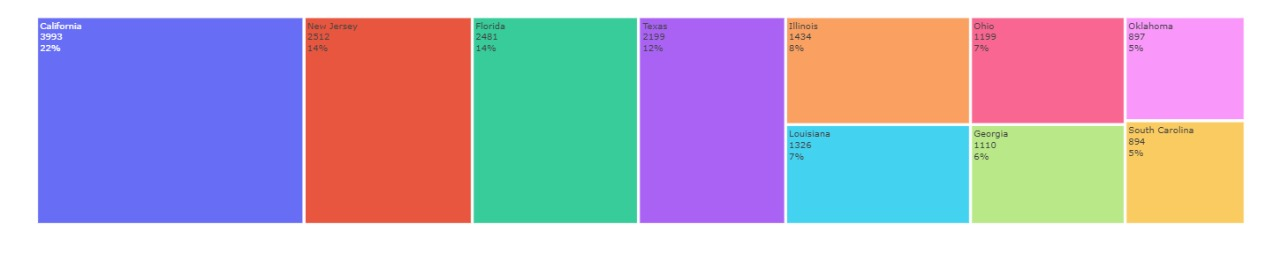

Estados en este archivo:
- New Jersey
- Texas
- Ohio
- Oklahoma
- South Carolina

------------

Se recopilan datos de reseñas de archivos JSON en la carpeta especificada y se crean dos columnas adicionales: `"state"` y `"year"`. La columna state almacena el nombre del estado correspondiente a los datos de reseñas y la columna year almacena el año en que se realizó la reseña. Estas columnas proporcionan información adicional que puede ser útil para el análisis posterior de los datos. Finalmente, el DataFrame resultante se guarda en formato Parquet con el nombre del estado en el archivo.

In [9]:
data = []

# sólo cambiar el nombre de la carpeta
carpeta = 'json/review-Texas'

# toma el nombre del estado
estado = carpeta.split('-')[1]

contador = 1

while os.path.exists(os.path.join(carpeta, f"{contador}.json")):
    file_path = os.path.join(carpeta, f"{contador}.json")
    
    with open(file_path) as json_file:
        for line in json_file:
            data.append(json.loads(line))            
    
    contador += 1

df = pd.DataFrame(data)

# agrega una columna con el estado
df['state'] = estado

# convierte a formato de fecha y hora
df['time'] = pd.to_datetime(df['time'], unit='ms')

# crea una nueva columna 'year' con el año extraído
df['year'] = df['time'].dt.year

# guarda el DF en un archivo Parquet dentro de la carpeta data
df.to_parquet(f"data/review-{estado}.parquet")

-----------------

-------------

## New Jersey

Convierte el archivo parquet que contiene datos de reseñas de locales de un estado a un dataframe

In [2]:
new_jersey = pd.read_parquet("data/review-New_jersey.parquet")

-----------

Vista del contenido de las 5 primeras filas:

- **user_id**: identificador único del usuario que dejó la reseña.
- **name**: nombre del usuario que dejó la reseña.
- **time**: fecha y hora en que se realizó la reseña.
- **rating**: calificación dada por el usuario.
- **text**: contenido del comentario dejado por el usuario.
- **pics**: imágenes relacionadas con la reseña.
- **resp**: respuestas del local al comentario.
- **gmap_id**: identificador de Google Maps asociado al lugar.
- **state**: estado al que pertenece el lugar.
- **year**: año en que se dejó la reseña.

In [3]:
new_jersey.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year
0,101190277000060800745,Monica Zobbi,2021-03-01 21:38:51.992,5,Viktoriya is always very professional and atte...,None,None,0x89c2fb42465dd457:0x437fc2232abf899,New_Jersey,2021
1,117269913257051471311,Vitaliia Stefurak,2019-11-05 17:26:32.541,5,"If I could leave them 10 starts I would , unbe...",None,None,0x89c2fb42465dd457:0x437fc2232abf899,New_Jersey,2019
2,115226987362661223566,Maria Guzman,2020-01-08 23:16:27.607,5,Laura took her time to know my hair and what s...,None,None,0x89c2fb42465dd457:0x437fc2232abf899,New_Jersey,2020
3,116182780268968248990,Jo Rad,2020-10-07 20:41:19.588,5,"Wow, what an experience! Haircut by Victoria! ...",None,{'text': 'Thank you! The team here at Bellibon...,0x89c2fb42465dd457:0x437fc2232abf899,New_Jersey,2020
4,101071187098115538507,Kimberly Hults,2020-06-24 21:28:27.348,5,Love this salon! The great experience starts o...,None,"{'text': 'Thanks for the awesome review, Kimbe...",0x89c2fb42465dd457:0x437fc2232abf899,New_Jersey,2020


------------

Resumen de la información:

- El DataFrame tiene un total de 950,370 filas.
- Hay 10 columnas en total.
- Cada columna tiene un nombre y una indicación del número de valores no nulos presentes en esa columna.
- El tipo de datos de cada columna se muestra.
- La memoria utilizada por el DataFrame se indica en MB.

In [4]:
new_jersey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950000 entries, 0 to 1949999
Data columns (total 10 columns):
 #   Column   Dtype         
---  ------   -----         
 0   user_id  object        
 1   name     object        
 2   time     datetime64[ns]
 3   rating   int64         
 4   text     object        
 5   pics     object        
 6   resp     object        
 7   gmap_id  object        
 8   state    object        
 9   year     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 141.3+ MB


------------

Muestra visualmente el porcentaje de valores nulos y no nulos para cada columna.

1. **Columnas con valores nulos**: Las columnas `"resp"` y `"pics"` tienen un porcentaje significativamente alto de valores nulos.

2. **Columnas sin valores nulos**: Las columnas `"user_id"`, `"name"`, `"time"`, `"rating"`, `"gmap_id"`, `"state"` y `"year"` tienen toda la información completa.

3. **Columna "text"**: La columna `"text"` tiene alrededor del 44% de sus valores como nulos. Esto podría indicar que no todos los registros tienen comentarios o textos asociados.

6. **Implicaciones para el análisis**: Las columnas con altos porcentajes de valores nulos pueden afectar el análisis de los datos, ya que la falta de información puede llevar a conclusiones incompletas o sesgadas.

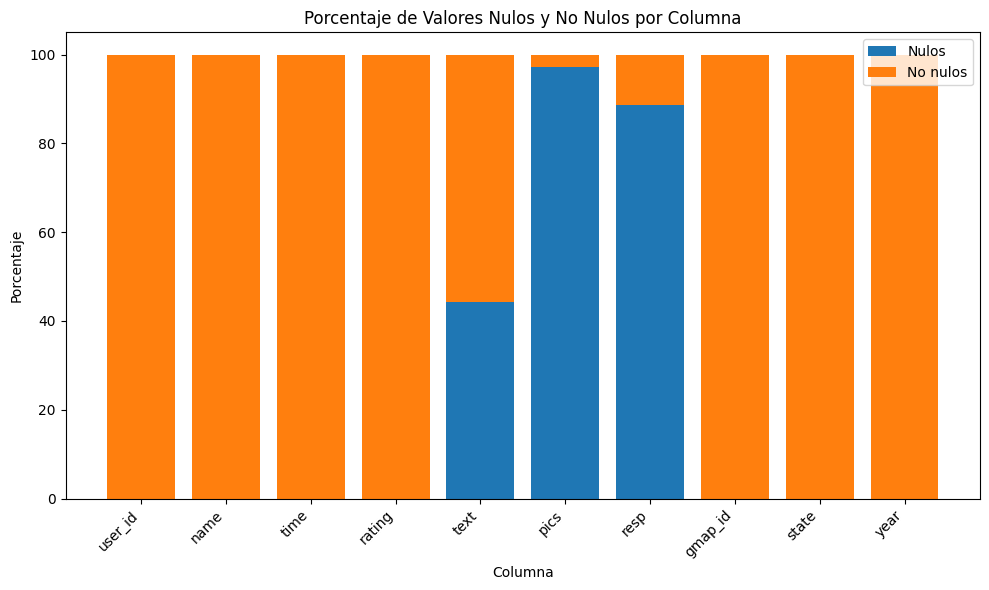

In [5]:
# Calcula el número de valores nulos en cada columna
total_nulos = new_jersey.isnull().sum()

# Calcula el número total de filas
total_filas = new_jersey.shape[0]

# Calcula el porcentaje de valores nulos en cada columna
porcentaje_nulos = (total_nulos / total_filas) * 100

# Calcula el porcentaje de valores no nulos en cada columna
porcentaje_no_nulos = 100 - porcentaje_nulos

# Crea un nuevo DataFrame con los resultados
df_nulos_new_jersey = pd.DataFrame({
    'Columna': new_jersey.columns,
    'Porcentaje nulos': porcentaje_nulos,
    'Porcentaje NO nulos': porcentaje_no_nulos
})

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras para los porcentajes de nulos y no nulos
plt.bar(df_nulos_new_jersey['Columna'], df_nulos_new_jersey['Porcentaje nulos'], label='Nulos')
plt.bar(df_nulos_new_jersey['Columna'], df_nulos_new_jersey['Porcentaje NO nulos'], bottom=df_nulos_new_jersey['Porcentaje nulos'], label='No nulos')

# Agregar etiquetas y título
plt.xlabel('Columna')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Valores Nulos y No Nulos por Columna')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Muestra el gráfico
plt.tight_layout()
plt.show()


---------

---------

## Ohio

Convierte el archivo parquet que contiene datos de reseñas de locales de un estado a un dataframe

In [6]:
ohio = pd.read_parquet("data/review-Ohio.parquet")

--------------

Vista del contenido de las 5 primeras filas:

- **user_id**: identificador único del usuario que dejó la reseña.
- **name**: nombre del usuario que dejó la reseña.
- **time**: fecha y hora en que se realizó la reseña.
- **rating**: calificación dada por el usuario.
- **text**: contenido del comentario dejado por el usuario.
- **pics**: imágenes relacionadas con la reseña.
- **resp**: respuestas del local al comentario.
- **gmap_id**: identificador de Google Maps asociado al lugar.
- **state**: estado al que pertenece el lugar.
- **year**: año en que se dejó la reseña.

In [7]:
ohio.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year
0,114733505901720471519,Justin Calabris,2020-03-15 00:41:52.307,1,I would not recommend.,None,"{'text': 'Justin, I am sorry to hear that you ...",0x8830cf8574b74559:0x64520f17d5e337dc,Ohio,2020
1,115546115125505203319,Benjamin Cope,2017-02-18 14:51:16.527,5,Quality communication and workmanship,None,None,0x8830cf8574b74559:0x64520f17d5e337dc,Ohio,2017
2,109114609771331992238,Jason Hammond,2021-08-16 01:26:04.606,5,None,None,None,0x8830cf8574b74559:0x64520f17d5e337dc,Ohio,2021
3,115969333473786857055,a Null,2017-01-30 00:58:46.073,2,None,None,None,0x8830cf8574b74559:0x64520f17d5e337dc,Ohio,2017
4,113888870632401106244,Justin F,2017-07-03 12:36:26.882,4,None,None,None,0x8830cf8574b74559:0x64520f17d5e337dc,Ohio,2017


------------

Resumen de la información:

- El DataFrame tiene un total de 1,950,000 filas.
- Hay 10 columnas en total.
- Para cada columna, se proporciona su nombre y el número de valores no nulos presentes.
- Se indica el tipo de datos de cada columna (por ejemplo, 'object', 'datetime64[ns]', 'int64', etc.)
- La memoria utilizada por el DataFrame es de aproximadamente 141.3 MB.

In [8]:
ohio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950000 entries, 0 to 1949999
Data columns (total 10 columns):
 #   Column   Dtype         
---  ------   -----         
 0   user_id  object        
 1   name     object        
 2   time     datetime64[ns]
 3   rating   int64         
 4   text     object        
 5   pics     object        
 6   resp     object        
 7   gmap_id  object        
 8   state    object        
 9   year     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 141.3+ MB


--------

Muestra visualmente el porcentaje de valores nulos y no nulos para cada columna:

1. **Columnas con valores nulos**: Las columnas `"resp"` y `"pics"` tienen un porcentaje significativamente alto de valores nulos.

2. **Columnas sin valores nulos**: Las columnas `"user_id"`, `"name"`, `"time"`, `"rating"`, `"gmap_id"`, `"state"` y `"year"` tienen toda la información completa.

3. **Columna "text"**: La columna `"text"` tiene alrededor del 44% de sus valores como nulos. Esto podría indicar que no todos los registros tienen comentarios o textos asociados.

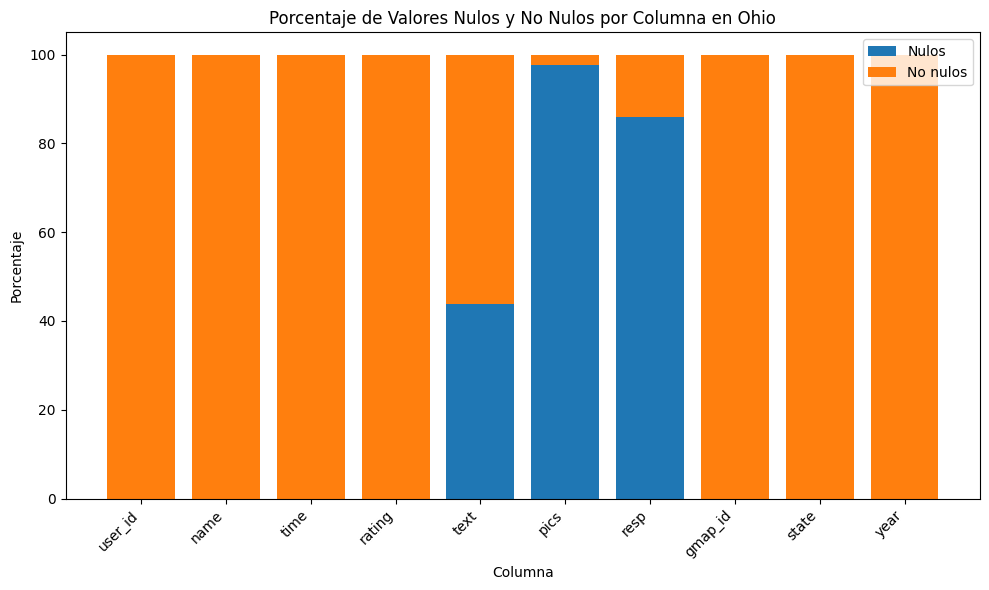

In [9]:
# Calcula el número de valores nulos en cada columna
total_nulos = ohio.isnull().sum()

# Calcula el número total de filas
total_filas = ohio.shape[0]

# Calcula el porcentaje de valores nulos en cada columna
porcentaje_nulos = (total_nulos / total_filas) * 100

# Calcula el porcentaje de valores no nulos en cada columna
porcentaje_no_nulos = 100 - porcentaje_nulos

# Crea un nuevo DataFrame con los resultados
df_nulos_ohio = pd.DataFrame({
    'Columna': ohio.columns,
    'Porcentaje nulos': porcentaje_nulos,
    'Porcentaje NO nulos': porcentaje_no_nulos
})

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras para los porcentajes de nulos y no nulos
plt.bar(df_nulos_ohio['Columna'], df_nulos_ohio['Porcentaje nulos'], label='Nulos')
plt.bar(df_nulos_ohio['Columna'], df_nulos_ohio['Porcentaje NO nulos'], bottom=df_nulos_ohio['Porcentaje nulos'], label='No nulos')

# Agregar etiquetas y título al gráfico
plt.xlabel('Columna')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Valores Nulos y No Nulos por Columna en Ohio')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

--------

----------

## Oklahoma

Convierte el archivo parquet que contiene datos de reseñas de locales de un estado a un dataframe

In [11]:
oklahoma = pd.read_parquet("data/review-Oklahoma.parquet")

-----------

Vista del contenido de las 5 primeras filas:

- **user_id**: identificador único del usuario que dejó la reseña.
- **name**: nombre del usuario que dejó la reseña.
- **time**: fecha y hora en que se realizó la reseña.
- **rating**: calificación dada por el usuario.
- **text**: contenido del comentario dejado por el usuario.
- **pics**: imágenes relacionadas con la reseña.
- **resp**: respuestas del local al comentario.
- **gmap_id**: identificador de Google Maps asociado al lugar.
- **state**: estado al que pertenece el lugar.
- **year**: año en que se dejó la reseña.

In [12]:
oklahoma.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year
0,108990106903261944178,Dana Schreiber,2021-08-27 15:26:47.996,5,"Very knowledgeable, you have a question they k...",None,None,0x87b2695af1ba5c73:0x13084fad93bafbe6,Oklahoma,2021
1,113811268211478361908,Julie Combs,2021-02-05 00:39:27.960,3,Well they had what I needed but the only Budt...,None,None,0x87b2695af1ba5c73:0x13084fad93bafbe6,Oklahoma,2021
2,102455850197465168450,Regi Glo,2020-08-25 20:29:07.506,5,Great place to shop... very helpful and they a...,None,{'text': 'Thank you for sharing! Hope to have ...,0x87b2695af1ba5c73:0x13084fad93bafbe6,Oklahoma,2020
3,103762530008535859564,Jaimee Steed,2020-06-30 00:29:54.427,5,Sara is fabulous and super sweet! Lots of choi...,None,{'text': 'Thank you so much ! Hope to see you ...,0x87b2695af1ba5c73:0x13084fad93bafbe6,Oklahoma,2020
4,116430839116161622337,Kaylee Miller,2019-11-30 23:29:23.539,1,This place always advertises good deals to get...,None,"{'text': 'I completely agree with you, Kaylee....",0x87b2695af1ba5c73:0x13084fad93bafbe6,Oklahoma,2019


---------

Resumen de la información:

- El DataFrame tiene un total de 1,650,000 filas.
- Hay 10 columnas en total.
- Para cada columna, se proporciona su nombre y el número de valores no nulos presentes.
- Se indica el tipo de datos de cada columna (por ejemplo, 'object', 'datetime64[ns]', 'int64', etc.)
- La memoria utilizada por el DataFrame es de aproximadamente 119.6 MB.

In [13]:
oklahoma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650000 entries, 0 to 1649999
Data columns (total 10 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   user_id  1650000 non-null  object        
 1   name     1650000 non-null  object        
 2   time     1650000 non-null  datetime64[ns]
 3   rating   1650000 non-null  int64         
 4   text     935257 non-null   object        
 5   pics     34795 non-null    object        
 6   resp     218812 non-null   object        
 7   gmap_id  1650000 non-null  object        
 8   state    1650000 non-null  object        
 9   year     1650000 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 119.6+ MB


-------------

Conclusión:
Muestra visualmente el porcentaje de valores nulos y no nulos para cada columna:

1. **Columnas con valores nulos**: Las columnas `"resp"` y `"pics"` tienen un porcentaje significativamente alto de valores nulos.

2. **Columnas sin valores nulos**: Las columnas `"user_id"`, `"name"`, `"time"`, `"rating"`, `"gmap_id"`, `"state"` y `"year"` tienen toda la información completa.

3. **Columna "text"**: La columna `"text"` tiene alrededor del 43.3% de sus valores como nulos. Esto podría indicar que no todos los registros tienen comentarios o textos asociados.

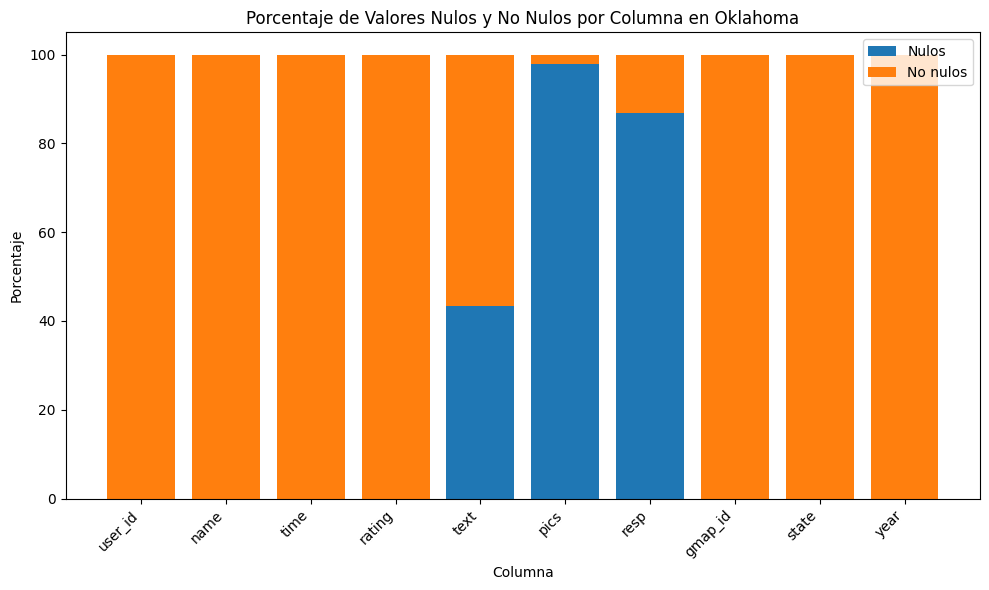

In [14]:
# Calcula el número de valores nulos en cada columna
total_nulos = oklahoma.isnull().sum()

# Calcula el número total de filas
total_filas = oklahoma.shape[0]

# Calcula el porcentaje de valores nulos en cada columna
porcentaje_nulos = (total_nulos / total_filas) * 100

# Calcula el porcentaje de valores no nulos en cada columna
porcentaje_no_nulos = 100 - porcentaje_nulos

# Crea un nuevo DataFrame con los resultados
df_nulos_oklahoma = pd.DataFrame({
    'Columna': oklahoma.columns,
    'Porcentaje nulos': porcentaje_nulos,
    'Porcentaje NO nulos': porcentaje_no_nulos
})

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras para los porcentajes de nulos y no nulos
plt.bar(df_nulos_oklahoma['Columna'], df_nulos_oklahoma['Porcentaje nulos'], label='Nulos')
plt.bar(df_nulos_oklahoma['Columna'], df_nulos_oklahoma['Porcentaje NO nulos'], bottom=df_nulos_oklahoma['Porcentaje nulos'], label='No nulos')

# Agrega etiquetas y título al gráfico
plt.xlabel('Columna')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Valores Nulos y No Nulos por Columna en Oklahoma')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

---------

-------

## South Carolina

Convierte el archivo parquet que contiene datos de reseñas de locales de un estado a un dataframe

In [15]:
south_carolina = pd.read_parquet("data/review-South_Carolina.parquet")

------

Vista del contenido de las 5 primeras filas:

- **user_id**: identificador único del usuario que dejó la reseña.
- **name**: nombre del usuario que dejó la reseña.
- **time**: fecha y hora en que se realizó la reseña.
- **rating**: calificación dada por el usuario.
- **text**: contenido del comentario dejado por el usuario.
- **pics**: imágenes relacionadas con la reseña.
- **resp**: respuestas del local al comentario.
- **gmap_id**: identificador de Google Maps asociado al lugar.
- **state**: estado al que pertenece el lugar.
- **year**: año en que se dejó la reseña.

In [16]:
south_carolina.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year
0,108990006967932198283,Pamela Poole,2021-01-22 14:53:07.871,4,They were very informative about the product...,None,None,0x8856e3dd768d3649:0xb38593eb55374673,South_Carolina,2021
1,115786965178279773121,Cleveland Grant,2018-03-07 22:39:29.713,5,Great Gun Shop!!! Best local shop you will fin...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x8856e3dd768d3649:0xb38593eb55374673,South_Carolina,2018
2,100954254888344692120,Sean Smith,2017-04-22 23:03:21.253,5,Met Jr and Cathy today at the gun show in Gree...,None,None,0x8856e3dd768d3649:0xb38593eb55374673,South_Carolina,2017
3,117716818447393496651,ThunderStroke91,2017-11-01 03:04:01.582,5,"Big variety, they've got what you need. They a...",None,None,0x8856e3dd768d3649:0xb38593eb55374673,South_Carolina,2017
4,103062008704992053963,Joshua Tongue,2020-01-07 23:03:49.754,5,None,None,None,0x8856e3dd768d3649:0xb38593eb55374673,South_Carolina,2020


------------

Resumen de la información:

- El DataFrame tiene un total de 2,100,000 filas.
- Hay 10 columnas en total.
- Para cada columna, se proporciona su nombre y el número de valores no nulos presentes.
- Se indica el tipo de datos de cada columna (por ejemplo, 'object', 'datetime64[ns]', 'int64', etc.).
- La memoria utilizada por el DataFrame es de aproximadamente 152.2 MB

In [17]:
south_carolina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100000 entries, 0 to 2099999
Data columns (total 10 columns):
 #   Column   Dtype         
---  ------   -----         
 0   user_id  object        
 1   name     object        
 2   time     datetime64[ns]
 3   rating   int64         
 4   text     object        
 5   pics     object        
 6   resp     object        
 7   gmap_id  object        
 8   state    object        
 9   year     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 152.2+ MB


-------------

Muestra visualmente el porcentaje de valores nulos y no nulos para cada columna:

1. **Columnas con valores nulos**: Las columnas `"resp"` y `"pics"` tienen un porcentaje significativamente alto de valores nulos.

2. **Columnas sin valores nulos**: Las columnas `"user_id"`, `"name"`, `"time"`, `"rating"`, `"gmap_id"`, `"state"` y `"year"` tienen toda la información completa.

3. **Columna "text"**: La columna `"text"` tiene alrededor del 43.4% de sus valores como nulos. Esto podría indicar que no todos los registros tienen comentarios o textos asociados.

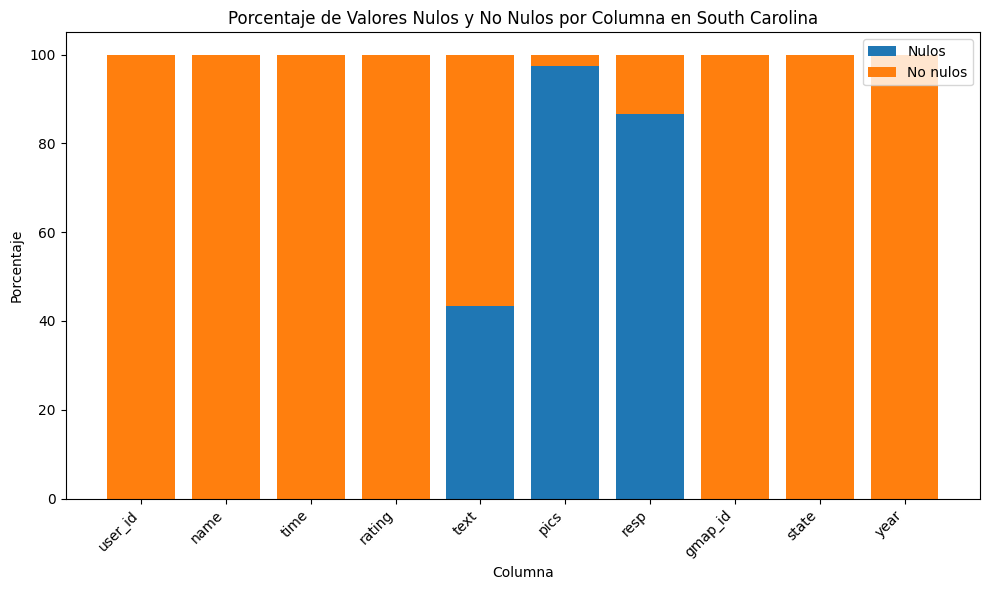

In [18]:
# Calcula el número de valores nulos en cada columna
total_nulos = south_carolina.isnull().sum()

# Calcula el número total de filas
total_filas = south_carolina.shape[0]

# Calcula el porcentaje de valores nulos en cada columna
porcentaje_nulos = (total_nulos / total_filas) * 100

# Calcula el porcentaje de valores no nulos en cada columna
porcentaje_no_nulos = 100 - porcentaje_nulos

# Crea un nuevo DataFrame con los resultados
df_nulos_south_carolina = pd.DataFrame({
    'Columna': south_carolina.columns,
    'Porcentaje nulos': porcentaje_nulos,
    'Porcentaje NO nulos': porcentaje_no_nulos
})

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras para los porcentajes de nulos y no nulos
plt.bar(df_nulos_south_carolina['Columna'], df_nulos_south_carolina['Porcentaje nulos'], label='Nulos')
plt.bar(df_nulos_south_carolina['Columna'], df_nulos_south_carolina['Porcentaje NO nulos'], bottom=df_nulos_south_carolina['Porcentaje nulos'], label='No nulos')

# Agrega etiquetas y título al gráfico
plt.xlabel('Columna')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Valores Nulos y No Nulos por Columna en South Carolina')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


---------------

----------

## Texas

Convierte el archivo parquet que contiene datos de reseñas de locales de un estado a un dataframe

In [19]:
texas = pd.read_parquet("data/review-Texas.parquet")

---------------

Vista del contenido de las 5 primeras filas:

- **user_id**: identificador único del usuario que dejó la reseña.
- **name**: nombre del usuario que dejó la reseña.
- **time**: fecha y hora en que se realizó la reseña.
- **rating**: calificación dada por el usuario.
- **text**: contenido del comentario dejado por el usuario.
- **pics**: imágenes relacionadas con la reseña.
- **resp**: respuestas del local al comentario.
- **gmap_id**: identificador de Google Maps asociado al lugar.
- **state**: estado al que pertenece el lugar.
- **year**: año en que se dejó la reseña.

In [20]:
texas.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year
0,110545299078970317447,Kimberly Feger,2021-07-04 20:48:54.826,5,"The pharmacist, Erin, is phenomenal. She was s...",None,None,0x864c3998b8d8dc83:0x57ffabe1e2322320,Texas,2021
1,103619788097506115343,Briana Streit,2019-09-13 00:58:03.913,2,I gave them 2 stars because they offer prescri...,None,None,0x864c3998b8d8dc83:0x57ffabe1e2322320,Texas,2019
2,101916663109091637233,Sylvia Caudillo,2018-03-01 03:06:26.872,1,If I could put minus stars I would. This has t...,None,None,0x864c3998b8d8dc83:0x57ffabe1e2322320,Texas,2018
3,117870898304582507607,Ginger Kinyon,2019-10-21 06:13:04.637,1,Please fix your restroom doors,None,None,0x864c3998b8d8dc83:0x57ffabe1e2322320,Texas,2019
4,110397346115416712442,Angeles Arellano,2019-01-04 02:27:57.087,1,This pharmacy Walmart dose not work not come a...,None,None,0x864c3998b8d8dc83:0x57ffabe1e2322320,Texas,2019


----------

Resumen de la información:

- El DataFrame tiene un total de 2,296,824 filas.
- Hay 10 columnas en total.
- Para cada columna, se proporciona su nombre y el número de valores no nulos presentes.
- Se indica el tipo de datos de cada columna (por ejemplo, 'object', 'datetime64[ns]', 'int64', etc.).
- La memoria utilizada por el DataFrame es de aproximadamente 166.5 MB.

In [21]:
texas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296824 entries, 0 to 2296823
Data columns (total 10 columns):
 #   Column   Dtype         
---  ------   -----         
 0   user_id  object        
 1   name     object        
 2   time     datetime64[ns]
 3   rating   int64         
 4   text     object        
 5   pics     object        
 6   resp     object        
 7   gmap_id  object        
 8   state    object        
 9   year     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 166.5+ MB


---------

Muestra visualmente el porcentaje de valores nulos y no nulos para cada columna:

1. **Columnas con valores nulos**: Las columnas `"resp"` y `"pics"` tienen un porcentaje significativamente alto de valores nulos.

2. **Columnas sin valores nulos**: Las columnas `"user_id"`, `"name"`, `"time"`, `"rating"`, `"gmap_id"`, `"state"` y `"year"` tienen toda la información completa.

3. **Columna "text"**: La columna `"text"` tiene alrededor del 40.0% de sus valores como nulos. Esto podría indicar que no todos los registros tienen comentarios o textos asociados.

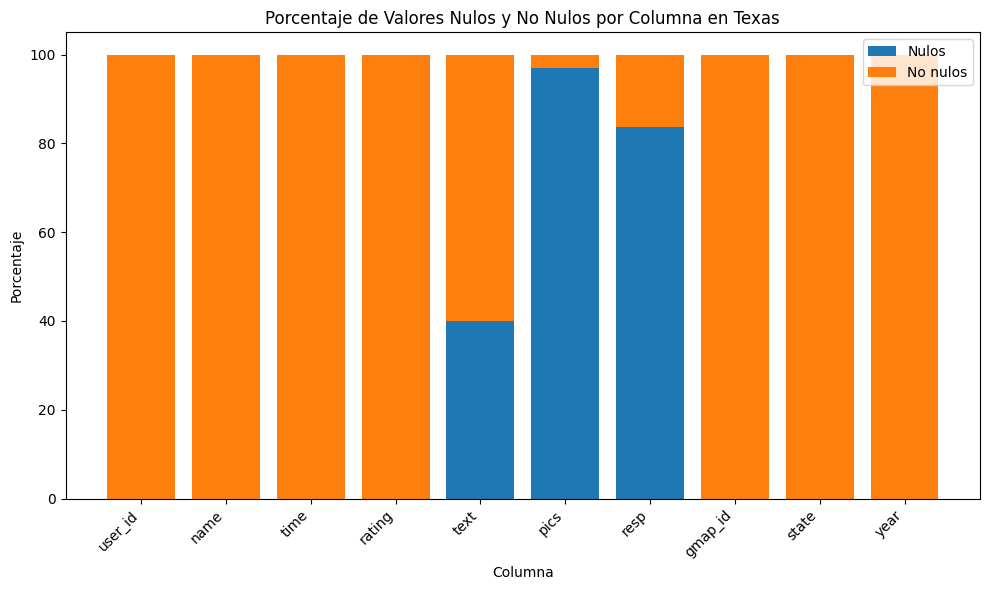

In [22]:
# Calcula el número de valores nulos en cada columna
total_nulos = texas.isnull().sum()

# Calcula el número total de filas
total_filas = texas.shape[0]

# Calcula el porcentaje de valores nulos en cada columna
porcentaje_nulos = (total_nulos / total_filas) * 100

# Calcula el porcentaje de valores no nulos en cada columna
porcentaje_no_nulos = 100 - porcentaje_nulos

# Crea un nuevo DataFrame con los resultados
df_nulos_texas = pd.DataFrame({
    'Columna': texas.columns,
    'Porcentaje nulos': porcentaje_nulos,
    'Porcentaje NO nulos': porcentaje_no_nulos
})

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras para los porcentajes de nulos y no nulos
plt.bar(df_nulos_texas['Columna'], df_nulos_texas['Porcentaje nulos'], label='Nulos')
plt.bar(df_nulos_texas['Columna'], df_nulos_texas['Porcentaje NO nulos'], bottom=df_nulos_texas['Porcentaje nulos'], label='No nulos')

# Agrega etiquetas y título al gráfico
plt.xlabel('Columna')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Valores Nulos y No Nulos por Columna en Texas')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

---------

-------

## DataFrame con el total de estados analizados 

Se creó una lista llamada `"dataframes"` que contiene los datos de: `"new_jersey"`, `"ohio"`, `"oklahoma"`, `"south_carolina"` y `"texas"`. Luego, se utilizó la función `pd.concat()` para unir estos DataFrames en uno solo, llamado `"df_total"`. El parámetro `ignore_index=True` se usó para reindexar las filas del nuevo DataFrame. Esto permite consolidar los datos de diferentes estados en un único DataFrame para análisis conjunto.

In [23]:
# crea una lista con todos los DataFrames
dataframes = [new_jersey, ohio, oklahoma, south_carolina, texas]

# une los DataFrames en uno solo
df_total = pd.concat(dataframes, ignore_index=True)

In [24]:
# muestra información sobre el DataFrame combinado
df_total.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year
0,101190277000060800745,Monica Zobbi,2021-03-01 21:38:51.992,5,Viktoriya is always very professional and atte...,None,None,0x89c2fb42465dd457:0x437fc2232abf899,New_Jersey,2021
1,117269913257051471311,Vitaliia Stefurak,2019-11-05 17:26:32.541,5,"If I could leave them 10 starts I would , unbe...",None,None,0x89c2fb42465dd457:0x437fc2232abf899,New_Jersey,2019
2,115226987362661223566,Maria Guzman,2020-01-08 23:16:27.607,5,Laura took her time to know my hair and what s...,None,None,0x89c2fb42465dd457:0x437fc2232abf899,New_Jersey,2020
3,116182780268968248990,Jo Rad,2020-10-07 20:41:19.588,5,"Wow, what an experience! Haircut by Victoria! ...",None,{'text': 'Thank you! The team here at Bellibon...,0x89c2fb42465dd457:0x437fc2232abf899,New_Jersey,2020
4,101071187098115538507,Kimberly Hults,2020-06-24 21:28:27.348,5,Love this salon! The great experience starts o...,None,"{'text': 'Thanks for the awesome review, Kimbe...",0x89c2fb42465dd457:0x437fc2232abf899,New_Jersey,2020


---------

El DataFrame `df_total` es un conjunto de datos amplio y diverso que contiene un total de 9,946,824 registros. Está compuesto por 10 columnas que representan diferentes aspectos de los datos, como información de usuarios, calificaciones, comentarios y ubicación. Las columnas `user_id`, `name`, `time`, `rating`, `gmap_id`, `state` y `year` no presentan valores nulos, lo que indica que tienen información completa en todos los registros. Por otro lado, las columnas `text`, `pics` y `resp` contienen valores nulos en diferentes proporciones, lo que puede tener implicaciones en el análisis posterior.

In [25]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9946824 entries, 0 to 9946823
Data columns (total 10 columns):
 #   Column   Dtype         
---  ------   -----         
 0   user_id  object        
 1   name     object        
 2   time     datetime64[ns]
 3   rating   int64         
 4   text     object        
 5   pics     object        
 6   resp     object        
 7   gmap_id  object        
 8   state    object        
 9   year     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 720.9+ MB


--------

1. **New Jersey**: El estado de New Jersey tiene la mayor cantidad de valores no nulos en el conjunto de datos, con un total de 9,946,824 valores no nulos. Esto indica que este estado tiene una gran cantidad de información disponible para el análisis.

2. **Ohio**: Ohio tiene una cantidad considerable de valores no nulos, con un total de 1,950,000 valores no nulos. Aunque es menor en comparación con New Jersey, sigue siendo una cantidad significativa de datos.

3. **Oklahoma**: En Oklahoma, encontramos 2,100,000 valores no nulos. Esto sugiere que también hay una cantidad adecuada de información para el análisis en este estado.

4. **South Carolina**: Similar a Oklahoma, South Carolina también tiene 2,100,000 valores no nulos, lo que indica una cantidad razonable de datos disponibles.

5. **Texas**: Texas tiene la segunda mayor cantidad de valores no nulos en el conjunto de datos, con un total de 2,296,824. Esto señala que Texas cuenta con una gran cantidad de información útil para el análisis.

En resumen, cada uno de estos estados tiene una cantidad significativa de valores no nulos en el conjunto de datos, lo que proporciona una base sólida para llevar a cabo análisis y exploración de datos detallados en cada estado.

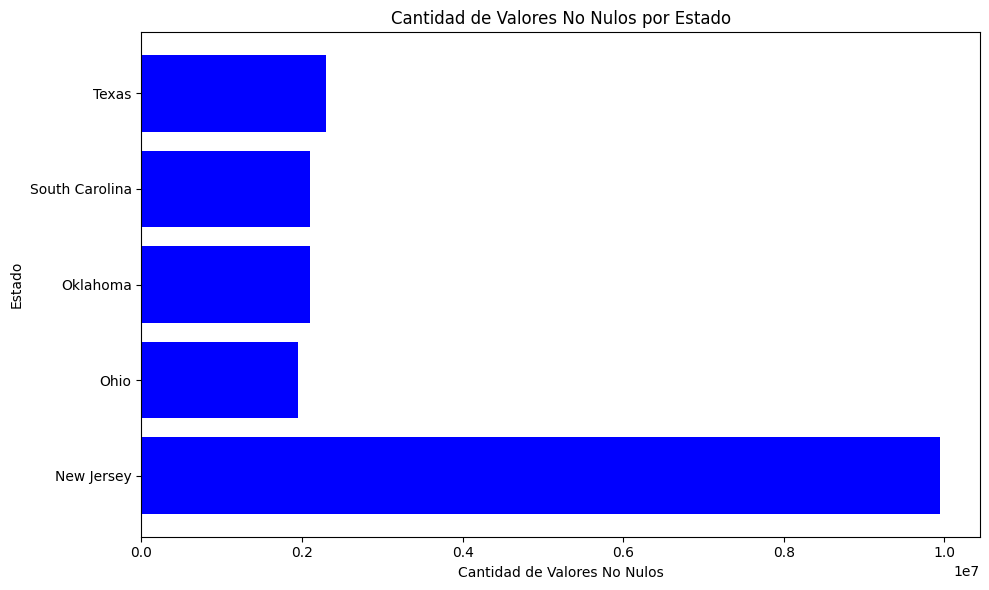

In [26]:
# Lista de nombres de estados
estados = ['New Jersey', 'Ohio', 'Oklahoma', 'South Carolina', 'Texas']

# Lista de cantidades de valores no nulos por estado
valores_no_nulos = [9946824, 1950000, 2100000, 2100000, 2296824]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras horizontales
plt.barh(estados, valores_no_nulos, color='blue')

# Agregar etiquetas y título
plt.xlabel('Cantidad de Valores No Nulos')
plt.ylabel('Estado')
plt.title('Cantidad de Valores No Nulos por Estado')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Crear un DataFrame con la misma información que se ve en el gráfico
df_valores_no_nulos = pd.DataFrame({
    'Estado': estados,
    'Valores No Nulos': valores_no_nulos
})

--------

Al analizar el DataFrame `"df_total"`, se observa una diferencia en el porcentaje de valores nulos y no nulos. La mayoría de las columnas presentan valores no nulos, lo que indica que la información en general está relativamente completa.

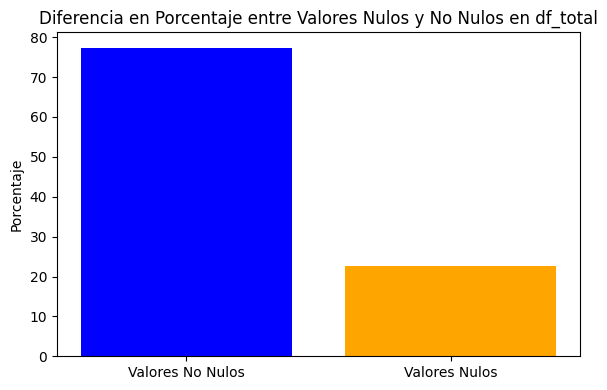

In [27]:
# Calcula el total de valores no nulos y valores nulos en el DataFrame
total_valores_no_nulos = df_total.count().sum()
total_valores_nulos = df_total.isnull().sum().sum()

# Calcula el porcentaje de valores no nulos y valores nulos
porcentaje_no_nulos = (total_valores_no_nulos / (total_valores_no_nulos + total_valores_nulos)) * 100
porcentaje_nulos = 100 - porcentaje_no_nulos

# Configurar el tamaño de la figura
plt.figure(figsize=(6, 4))

# Crear un gráfico de barras
plt.bar(['Valores No Nulos', 'Valores Nulos'], [porcentaje_no_nulos, porcentaje_nulos], color=['blue', 'orange'])

# Agregar etiquetas y título
plt.ylabel('Porcentaje')
plt.title('Diferencia en Porcentaje entre Valores Nulos y No Nulos en df_total')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


---------

Convierte los diccionarios en strings en la columna "resp"

In [28]:
df_total['resp'] = df_total['resp'].apply(lambda x: x.get('text') if isinstance(x, dict) else x)

----------

Elimina los caracteres especificados de las columnas 'text' y 'resp'

In [29]:
df_total['text'] = df_total['text'].str.replace(')', '').str.replace('(', '').str.replace('&', '').str.replace('.', '')
df_total['resp'] = df_total['resp'].str.replace(')', '').str.replace('(', '').str.replace('&', '').str.replace('.', '')


------------

In [30]:
from collections import Counter

# Lista de palabras a evitar en minúsculas (preposiciones y otras excepciones)
stop_words = ['and', 'the', 'to', 'i', 'a', 'was', 'is', 'for', 'of', 'in', 'my', 'they', 'very', 'it', 'you', 'with','this','have','are','that','on','but','not','place','food','had','service','we','at','me','so','be','always','were','there','get','all','as','staff','will','if','out','go','time','an','just','their','like','your','from','when','by','he','been','no','what','one','here','would','or','our','she','up','people','about','really','do',"it's",'them','has','back','can','only','got','customer','even','never','recommend','more','some','did','work','service','going','because', 'store','other', 'new', 'prices', 'went', "don't", 'her', 'than', 'also', 'after', 'well', 'little','google','his','translated','experience']

# Crea una función para filtrar palabras vacías y contar ocurrencias en un lote
def count_most_common_words_in_batch(text_batch):
    words = text_batch.split()
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return Counter(filtered_words)

# Contador de palabras
word_counts = Counter()

# Procesa los textos en partes más pequeñas
batch_size = 10000
num_batches = len(df_total) // batch_size + 1

for batch_num in range(num_batches):
    start_idx = batch_num * batch_size
    end_idx = start_idx + batch_size
    batch_text = ' '.join(df_total['text'].iloc[start_idx:end_idx].dropna())
    batch_word_counts = count_most_common_words_in_batch(batch_text)
    word_counts += batch_word_counts

# Obtiene las palabras más comunes y su conteo
most_common_words = word_counts.most_common(10)  # Cambia 10 por el número deseado

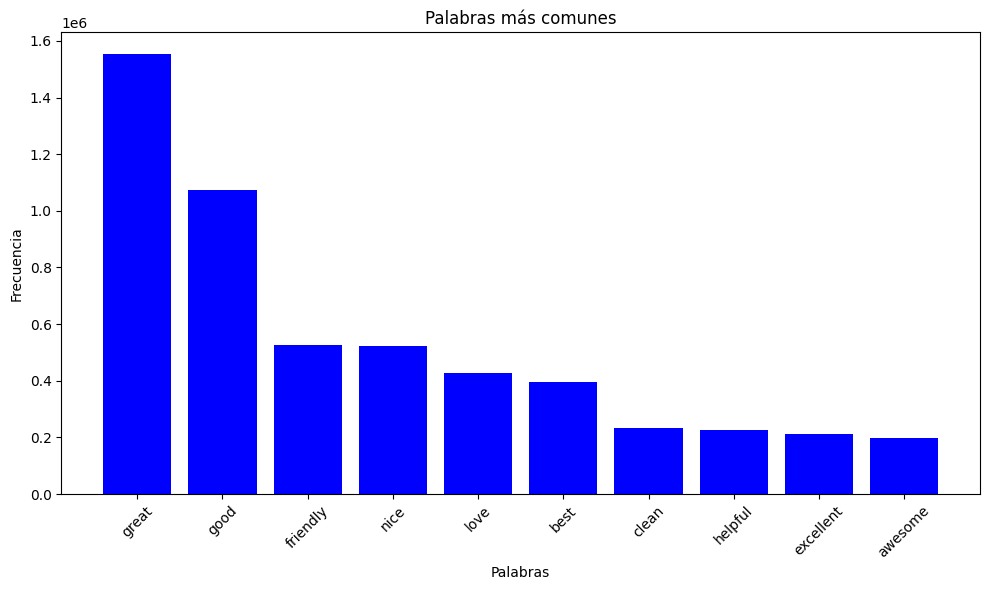

In [31]:
# Extrae las palabras y los conteos para el gráfico
words = [word for word, _ in most_common_words]
counts = [count for _, count in most_common_words]

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='blue')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes')
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [32]:
# Imprimir las palabras más comunes y su conteo
for word, count in most_common_words:
    print(f'Palabra: {word}, Cantidad: {count}')

Palabra: great, Cantidad: 1552491
Palabra: good, Cantidad: 1073536
Palabra: friendly, Cantidad: 524880
Palabra: nice, Cantidad: 522018
Palabra: love, Cantidad: 426703
Palabra: best, Cantidad: 395765
Palabra: clean, Cantidad: 234661
Palabra: helpful, Cantidad: 225348
Palabra: excellent, Cantidad: 211972
Palabra: awesome, Cantidad: 199053


---------------

In [33]:
# Crea un diccionario para almacenar los resultados
results = {}

# Obtiene la lista de estados únicos en el DataFrame
unique_states = df_total['state'].unique()

# Itera a través de cada estado
for state in unique_states:
    state_df = df_total[df_total['state'] == state]
    state_text = ' '.join(state_df['text'].dropna())
    state_word_counts = count_most_common_words_in_batch(state_text)
    
    most_common_words = state_word_counts.most_common(10)  # Cambia 10 por el número deseado
    words_counts_dict = {word: count for word, count in most_common_words}
    
    results[state] = words_counts_dict

# Crea un DataFrame a partir de los resultados
palabras_repetidas = pd.DataFrame(results)

# Transpone el DataFrame para que los estados sean filas y las palabras sean columnas
palabras_repetidas = palabras_repetidas.transpose()

# Muestra el DataFrame
palabras_repetidas

,great,good,nice,friendly,best,love,original,excellent,clean,helpful,awesome,amazing
New_Jersey,290443.0,229521.0,106712.0,88938.0,84786.0,73069.0,55229.0,50359.0,45313.0,36738.0,NaN,NaN
Ohio,309489.0,185029.0,112146.0,104548.0,69232.0,80154.0,NaN,35543.0,41854.0,46170.0,37631.0,NaN
Oklahoma,242237.0,181664.0,79833.0,93897.0,64680.0,76025.0,NaN,NaN,39689.0,41174.0,33267.0,28042.0
South_Carolina,343623.0,225033.0,102967.0,110653.0,78552.0,90640.0,NaN,41365.0,49858.0,43900.0,43817.0,NaN
Texas,366699.0,252289.0,120360.0,126844.0,98515.0,106815.0,64817.0,57160.0,57947.0,57366.0,NaN,NaN
